In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
cleaned_files = os.listdir("cleaned_data\\")

# combining data into single frame
dataframes = [pd.read_csv(f"cleaned_data\\{file}") for file in cleaned_files]
data = pd.concat(dataframes)

In [3]:
data.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,ride_distance_km,ride_length_seconds,member_casual_binary
4234395,91D42B1E3F1D5063,classic_bike,2024-06-12 21:48:00,2024-06-12 21:56,Ravenswood Ave & Lawrence Ave,TA1309000066,Campbell Ave & Montrose Ave,15623,41.968445,-87.674226,41.961524,-87.691177,member,00:08:00,4,1.598891,480,1
4234396,DA3E5D7DFFA3C044,classic_bike,2024-06-11 17:11:00,2024-06-11 17:17,Damen Ave & Leland Ave,TA1307000158,Campbell Ave & Montrose Ave,15623,41.966946,-87.678893,41.961524,-87.691177,member,00:06:00,3,1.181111,360,1
4234397,8DAAD10EE8F1A773,classic_bike,2024-06-13 09:11:00,2024-06-13 9:23,Damen Ave & Leland Ave,TA1307000158,Western Ave & Roscoe St,15634,41.966946,-87.678893,41.943034,-87.687288,member,00:12:00,5,2.748023,720,1
4234398,0B00C760F3BAE044,electric_bike,2024-06-03 19:41:00,2024-06-03 19:46,Damen Ave & Leland Ave,TA1307000158,Campbell Ave & Montrose Ave,15623,41.967110,-87.679160,41.961524,-87.691177,member,00:05:00,2,1.171745,300,1
4234399,1D1EBE57758FB1EE,electric_bike,2024-06-11 08:25:00,2024-06-11 8:33,Ravenswood Ave & Lawrence Ave,TA1309000066,Campbell Ave & Montrose Ave,15623,41.968466,-87.674225,41.961524,-87.691177,member,00:08:00,3,1.600092,480,1


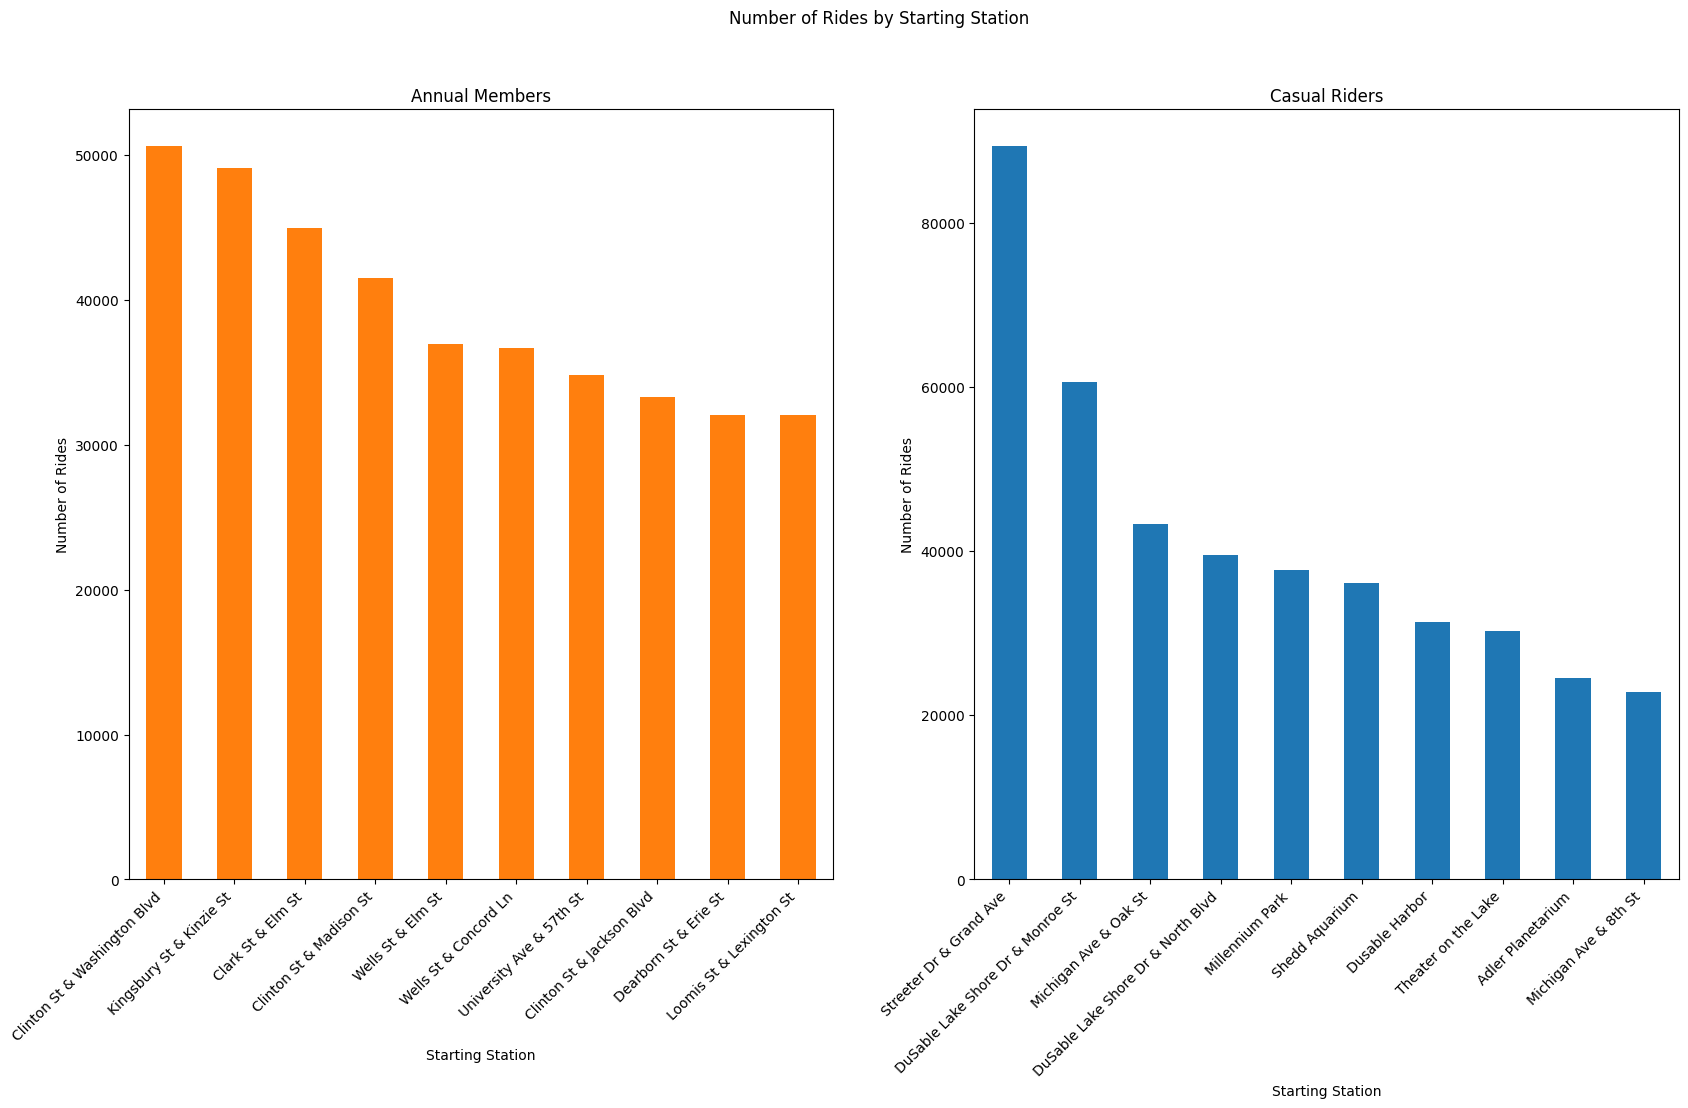

In [30]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

fig.suptitle("Number of Rides by Starting Station")

# Plot for members' starting station
data[data["member_casual"] == "member"]["start_station_name"].value_counts().nlargest(10).plot(
    kind='bar', ax=ax1, color='tab:orange')
ax1.set_ylabel('Number of Rides')
ax1.set_xlabel('Starting Station')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title("Annual Members")

# Plot for casuals' starting station
data[data["member_casual"] == "casual"]["start_station_name"].value_counts().nlargest(10).plot(
    kind='bar', ax=ax2, color='tab:blue')
 
ax2.set_ylabel('Number of Rides')
ax2.set_xlabel('Starting Station')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title("Casual Riders")

#plt.tight_layout()
plt.show()


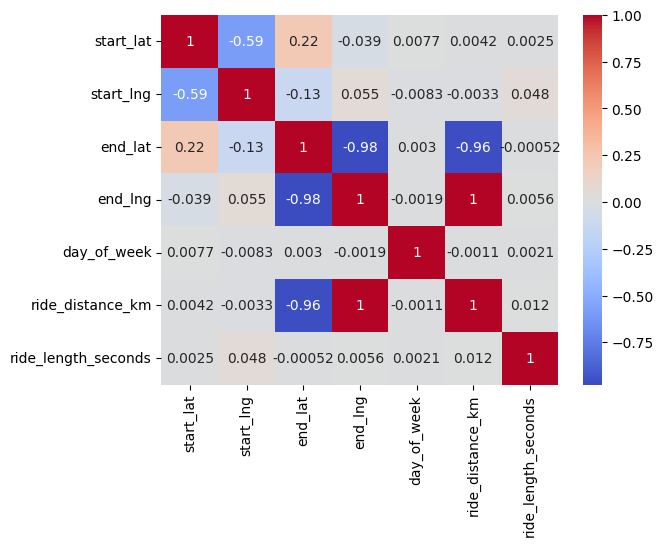

In [5]:
numeric_data = data[['start_lat',
                     'start_lng',
                     'end_lat',
                     'end_lng',
                     'day_of_week',
                     'ride_distance_km',
                     'ride_length_seconds']]
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm");

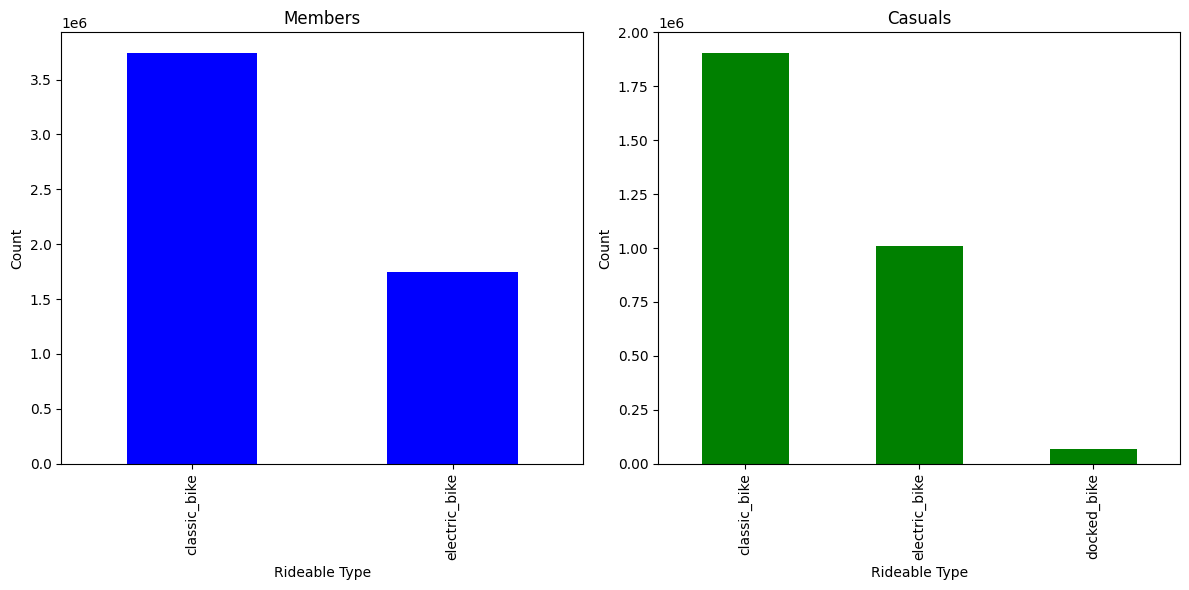

In [6]:
member_data = data[data["member_casual"] == "member"]
casual_data = data[data["member_casual"] == "casual"]

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the bar chart for members
member_data["rideable_type"].value_counts().plot.bar(ax=axes[0], color='b')
axes[0].set_title('Members')
axes[0].set_xlabel('Rideable Type')
axes[0].set_ylabel('Count')

# Plot the bar chart for casuals
casual_data["rideable_type"].value_counts().plot.bar(ax=axes[1], color='g')
axes[1].set_title('Casuals')
axes[1].set_xlabel('Rideable Type')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

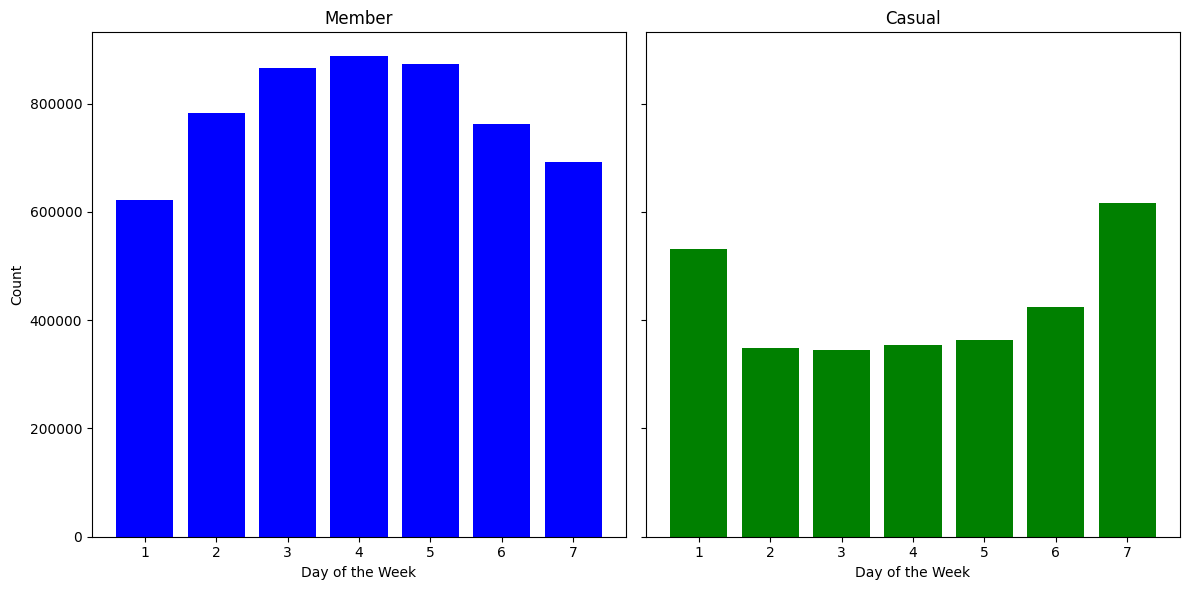

In [7]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for 'member'
member_data = member_data['day_of_week'].value_counts()
axs[0].bar(member_data.index, member_data.values, color='b')
axs[0].set_title('Member')
axs[0].set_xlabel('Day of the Week')
axs[0].set_ylabel('Count')

# Plot for 'casual'
casual_data = casual_data['day_of_week'].value_counts()
axs[1].bar(casual_data.index, casual_data.values, color='g')
axs[1].set_title('Casual')
axs[1].set_xlabel('Day of the Week')

# Adjust layout
plt.tight_layout()
plt.show()


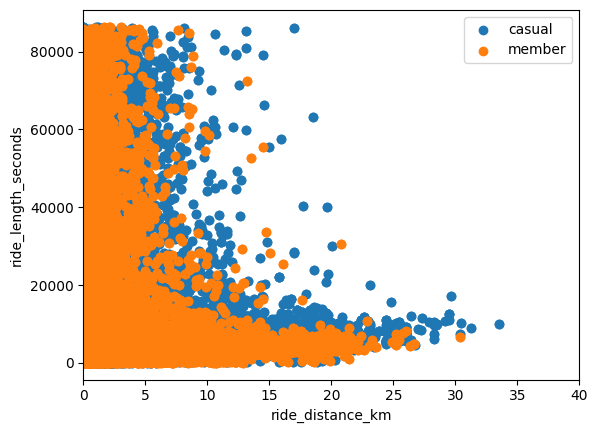

In [8]:
fig, ax = plt.subplots()

for name, group in data.groupby('member_casual'):
    ax.scatter(
        group['ride_distance_km'], group['ride_length_seconds'], label=name)

plt.legend()
plt.xlabel('ride_distance_km')
plt.ylabel('ride_length_seconds')
plt.xlim(0, 40);

In [9]:
#data.to_csv("cleaned_data/clean-full-12-months.csv", index=False)